# Decision Trees
## Predicting a Person's Activity Based on Smartphone Data

In [2]:
from IPython.display import display, HTML
import pandas as pd
from sklearn import cross_validation as cv
from sklearn.ensemble import RandomForestClassifier
import operator
from sklearn import metrics
data_dir = 'data/HAPT_Data_Set/'

**Step 1:** Create initial training data table, filtered for 'Mag' and 'Angle' variables, and adding 'subject' and 'activity' columns:

In [3]:
with open(data_dir+'features.txt','r') as f:
    features = [line.strip() for line in f]
sub_features_names = [s for s in features if ('Mag' in s) or ('Angle' in s)]
sub_features_indices = [features.index(name) for name in sub_features_names]

In [4]:
df = pd.read_table(data_dir+'Train/X_train.txt', delimiter=' ',
                       usecols=sub_features_indices, names=sub_features_names)
df.head()

tBodyAccMag-Mean-1  tBodyAccMag-STD-1  tBodyAccMag-Mad-1  \
0           -0.969546          -0.961540          -0.967646   
1           -0.984484          -0.981042          -0.983105   
2           -0.987805          -0.990189          -0.990798   
3           -0.989940          -0.988966          -0.989351   
4           -0.994669          -0.992678          -0.992968   

   tBodyAccMag-Max-1  tBodyAccMag-Min-1  tBodyAccMag-SMA-1  \
0          -0.947236          -0.994174          -0.969546   
1          -0.979658          -0.996348          -0.984484   
2          -0.987446          -0.996348          -0.987805   
3          -0.987446          -0.997687          -0.989940   
4          -0.991914          -0.997687          -0.994669   

   tBodyAccMag-Energy-1  tBodyAccMag-IQR-1  tBodyAccMag-ropy-1  \
0             -0.999150          -0.970525           -0.219620   
1             -0.999709          -0.986893           -0.426713   
2             -0.999818          -0.990025           -0.583114   
3             -0.999849          -0.988460           -0.572296   
4             -0.999929          -0.992688           -0.686673   

   tBodyAccMag-ARCoeff-1          ...            fBodyGyroJerkMag-MeanFreq-1  \
0              -0.124072          ...                              -0.012236   
1               0.129618          ...                               0.202804   
2               0.086279          ...                               0.440079   
3              -0.044082          ...                               0.430891   
4               0.228080          ...                               0.137735   

   fBodyGyroJerkMag-Skewness-1  fBodyGyroJerkMag-Kurtosis-1  \
0                    -0.314848                    -0.713308   
1                    -0.603199                    -0.860677   
2                    -0.404427                    -0.761847   
3                    -0.138373                    -0.491604   
4                    -0.366214                    -0.702490   

   tBodyAcc-AngleWRTGravity-1  tBodyAccJerk-AngleWRTGravity-1  \
0                   -0.112754                        0.030400   
1                    0.053477                       -0.007435   
2                   -0.118559                        0.177899   
3                   -0.036788                       -0.012892   
4                    0.123320                        0.122542   

   tBodyGyro-AngleWRTGravity-1  tBodyGyroJerk-AngleWRTGravity-1  \
0                    -0.464761                        -0.018446   
1                    -0.732626                         0.703511   
2                     0.100699                         0.808529   
3                     0.640011                        -0.485366   
4                     0.693578                        -0.615971   

   tXAxisAcc-AngleWRTGravity-1  tYAxisAcc-AngleWRTGravity-1  \
0                    -0.841559                     0.179913   
1                    -0.845092                     0.180261   
2                    -0.849230                     0.180610   
3                    -0.848947                     0.181907   
4                    -0.848164                     0.185124   

   tZAxisAcc-AngleWRTGravity-1  
0                    -0.051718  
1                    -0.047436  
2                    -0.042271  
3                    -0.040826  
4                    -0.037080  

[5 rows x 124 columns]

In [5]:
with open(data_dir+'Train/subject_id_train.txt','r') as f:
    df['subject'] = [line.strip() for line in f]
with open(data_dir+'Train/y_train.txt','r') as f:
    df['activity'] = [line.strip() for line in f]

**Step 2:** Create initial test table using same process:

In [6]:
df_test = pd.read_table(data_dir+'Test/X_test.txt', delimiter=' ',
                       usecols=sub_features_indices, names=sub_features_names)
with open(data_dir+'Test/subject_id_test.txt','r') as f:
    df_test['subject'] = [line.strip() for line in f]
with open(data_dir+'Test/y_test.txt','r') as f:
    df_test['activity'] = [line.strip() for line in f]

**Step 3:** Plot body acceleration magnitude histograms for the 12 activities to evaluate the ability of this variable to predict static vs dynamic activities:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fced7ac2e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fced7530b00>]], dtype=object)

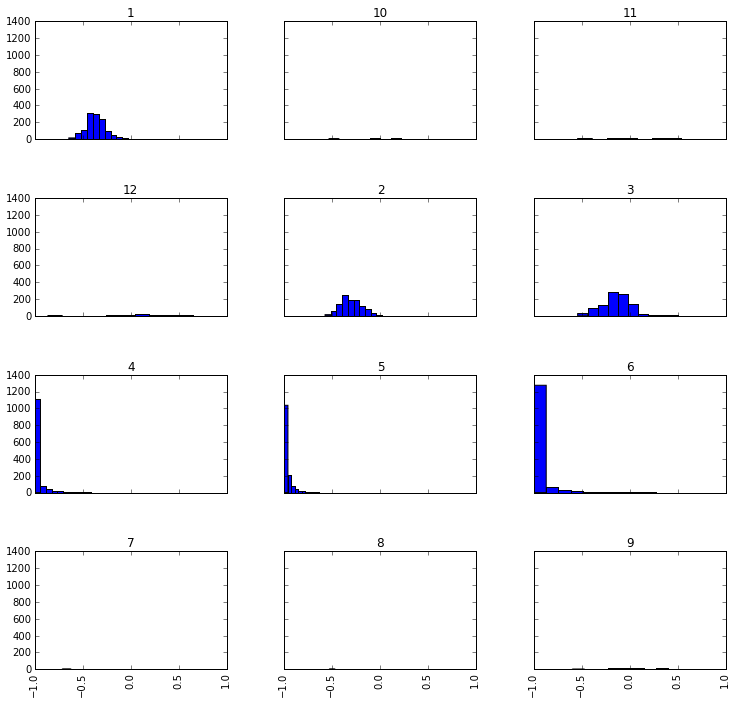

In [7]:
%matplotlib inline
df['tBodyAccMag-Mean-1'].hist(by=df['activity'],figsize=(12,12), sharey=True, sharex=True)

**Step 4:** Split the initial training table into training and validation sets, and fit a random forest classifier to the training set:

In [17]:
X = df[df.columns.tolist()[:-1]]
y = df['activity']

X_train, X_val, y_train, y_val = cv.train_test_split(X, y, train_size=0.8, random_state=0)
clf = RandomForestClassifier(n_estimators=500, oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

**Step 5:** Rank the features by importance scores, and single out the 10th feature's score:
(Metrics between this and the black box model will be compared and summarized in the report's conclusion below.)

In [9]:
importance_scores = clf.feature_importances_.tolist()
important_features = zip(df.columns.tolist()[:-1], importance_scores)
top_10_features = sorted(important_features, key=lambda x: x[1], reverse=True)[:10]
top_10_features

[('tXAxisAcc-AngleWRTGravity-1', 0.1131431295813066),
 ('tYAxisAcc-AngleWRTGravity-1', 0.10456489804848623),
 ('tZAxisAcc-AngleWRTGravity-1', 0.060352020232845735),
 ('tBodyAccJerkMag-Mean-1', 0.021933599726099564),
 ('tBodyAccJerkMag-ropy-1', 0.020021518541678454),
 ('tBodyAccJerkMag-SMA-1', 0.019124374406707008),
 ('tBodyAccJerkMag-Mad-1', 0.017207486871467552),
 ('tBodyGyroJerkMag-SMA-1', 0.016436152016520333),
 ('tBodyAccJerkMag-Energy-1', 0.01606272752350939),
 ('tBodyAccMag-STD-1', 0.015531806119248325)]

In [10]:
print('The 10th most important feature is ' + str(top_10_features[9][0]) +\
       ', which has an importance score of ' + str(top_10_features[9][1]) + '.')

The 10th most important feature is tBodyAccMag-STD-1, which has an importance score of 0.015531806119248325.


**Step 6:** Identify the model's accuracy score on the validation and test sets, and the precision, recall, and F1 scores on the test set:

In [11]:
predicted_from_val = clf.predict(X_val)
expected_from_val = y_val

metrics.accuracy_score(expected_from_val, predicted_from_val)

0.94594594594594594

In [12]:
predicted_from_test = clf.predict(df_test[df_test.columns.tolist()[:-1]])
expected_from_test = df_test['activity']

metrics.accuracy_score(expected_from_test, predicted_from_test)

0.87413029728020242

In [13]:
metrics.precision_score(expected_from_test, predicted_from_test, average=None)

array([ 0.83076923,  0.56666667,  0.58139535,  0.53846154,  0.82700422,
        0.95142857,  0.89194915,  0.85521886,  1.        ,  0.55555556,
        0.83333333,  0.5       ])

In [14]:
metrics.recall_score(expected_from_test, predicted_from_test, average=None)

array([ 0.97983871,  0.68      ,  0.51020408,  0.25925926,  0.83227176,
        0.79285714,  0.82874016,  0.91366906,  0.99633028,  0.43478261,
        0.5       ,  0.53125   ])

In [15]:
metrics.f1_score(expected_from_test, predicted_from_test, average=None)

array([ 0.89916744,  0.61818182,  0.54347826,  0.35      ,  0.82962963,
        0.86493506,  0.85918367,  0.88347826,  0.99816176,  0.48780488,
        0.625     ,  0.51515152])

**Step 6a:** Include the model's oob score and confusion matrix on the test set:

In [18]:
clf.oob_score_

0.93899887333011423

In [19]:
metrics.confusion_matrix(expected_from_test, predicted_from_test)

array([[486,   0,   0,   0,   3,   7,   0,   0,   0,   0,   0,   0],
       [  0,  17,   1,   5,   1,   0,   0,   0,   0,   0,   0,   1],
       [  2,   0,  25,   1,   6,   0,   1,   0,   0,   3,   0,  11],
       [  1,  12,   3,   7,   1,   0,   0,   0,   0,   0,   0,   3],
       [ 69,   0,   0,   0, 392,  10,   0,   0,   0,   0,   0,   0],
       [ 27,   0,   0,   0,  60, 333,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 421,  86,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   0,  47, 508,   0,   1,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0, 543,   1,   0,   0],
       [  0,   0,   3,   0,   7,   0,   2,   0,   0,  10,   1,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   2,   5,   2],
       [  0,   1,  11,   0,   3,   0,   0,   0,   0,   0,   0,  17]])

In [24]:
type(subjects)

NameError: name 'subjects' is not defined

**Step 7:** Create new table for black box analysis, anonymizing the column names:

In [26]:
bb_col_names = ['x'+ str(n) for n in range(len(features))]
black_box_df = pd.read_table(data_dir+'Train/X_train.txt', delimiter=' ',
                             names=bb_col_names)
black_box_df['subject'] = df['subject'].astype(int)
black_box_df['activity'] = df['activity'].astype(int)
black_box_df.tail()

x0        x1        x2        x3        x4        x5        x6  \
7762  0.048048 -0.042445 -0.065884 -0.195448 -0.278326 -0.219954 -0.282233   
7763  0.037639  0.006430 -0.044345 -0.235372 -0.302680 -0.232843 -0.322483   
7764  0.037451 -0.002724  0.021009 -0.218281 -0.378082 -0.076950 -0.304446   
7765  0.044011 -0.004536 -0.051242 -0.219202 -0.383350 -0.081035 -0.310419   
7766  0.068954  0.001810 -0.080323 -0.269336 -0.366553 -0.147294 -0.377332   

            x7        x8        x9    ...         x553      x554      x555  \
7762 -0.305861 -0.357803  0.267874    ...    -0.879026 -0.190437  0.829718   
7763 -0.354464 -0.345592  0.181271    ...    -0.684496  0.064907  0.875679   
7764 -0.400661 -0.193071  0.113141    ...    -0.317314  0.052806 -0.266724   
7765 -0.380233 -0.201007  0.166671    ...    -0.356579 -0.101360  0.700740   
7766 -0.360597 -0.255505  0.321881    ...    -0.742972 -0.280088 -0.007739   

          x556      x557      x558      x559      x560  subject  activity  
7762  0.206972 -0.425619 -0.792292  0.238580  0.056020       30         2  
7763 -0.879033  0.400219 -0.772288  0.252653  0.056252       30         2  
7764  0.864404  0.701169 -0.779566  0.249121  0.047071       30         2  
7765  0.936674 -0.589479 -0.785603  0.246409  0.031700       30         2  
7766 -0.056088 -0.616956 -0.783693  0.246785  0.042981       30         2  

[5 rows x 563 columns]

**Step 8:** Split the black box table into training, validation, and testing segments, using a 50%/25%/25% split:

In [27]:
bbdf_X_train = black_box_df[black_box_df.subject <=15].iloc[:,:-1]
bbdf_X_val = black_box_df[(black_box_df.subject > 15) & 
                          (black_box_df.subject < 23)].iloc[:,:-1]
bbdf_X_test = black_box_df[black_box_df.subject >=23].iloc[:,:-1]

bbdf_y_train = black_box_df[black_box_df.subject <=15].iloc[:,-1:].ix[:,0]
bbdf_y_val = black_box_df[(black_box_df.subject > 15) & 
                          (black_box_df.subject < 23)].iloc[:,-1:].ix[:,0]
bbdf_y_test = black_box_df[black_box_df.subject >=23].iloc[:,-1:].ix[:,0]

**Step 9:** Fit the training set to the model and determine the oob score:

In [28]:
clf2 = RandomForestClassifier(n_estimators=50, oob_score=True)
clf2.fit(bbdf_X_train, bbdf_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [29]:
clf2.oob_score_

0.96118421052631575

**Step 10:** Rank the black box features by their importance scores, apply original column names, and single out the 10th feature's score for comparison:

In [30]:
bb_importance_scores = clf2.feature_importances_.tolist()
bb_important_features = zip(features[:-1], bb_importance_scores)
bb_top_10_features = sorted(bb_important_features, key=lambda x: x[1], reverse=True)[:10]
bb_top_10_features

[('tGravityAcc-Mean-2', 0.03668072246634894),
 ('tGravityAcc-Min-2', 0.03647996541071186),
 ('tGravityAcc-Min-1', 0.031210318061807695),
 ('tGravityAcc-Energy-1', 0.027873149903757624),
 ('tBodyAccJerk-IQR-1', 0.02590748521061497),
 ('tGravityAcc-Max-1', 0.022971532417803687),
 ('tXAxisAcc-AngleWRTGravity-1', 0.022952275478049157),
 ('tGravityAcc-Max-2', 0.021390209213937573),
 ('tYAxisAcc-AngleWRTGravity-1', 0.020704058685732597),
 ('fBodyAccJerk-BandsEnergyOld-13', 0.016331150409914078)]

In [32]:
print('The 10th most important feature is ' + bb_top_10_features[9][0] +\
       ', which has an importance score of ' + str(bb_top_10_features[9][1]) + '.')

The 10th most important feature is fBodyAccJerk-BandsEnergyOld-13, which has an importance score of 0.016331150409914078.


**Step 11:** Determine black box model's accuracy score for the validation and test sets, and determine the confusion matrix and scores for precision, recall, and F1 on the test set.

In [33]:
predicted_from_bb_val = clf2.predict(bbdf_X_val)
expected_from_bb_val = bbdf_y_val

metrics.accuracy_score(expected_from_bb_val, predicted_from_bb_val)

0.86424870466321246

In [34]:
predicted_from_bb_test = clf2.predict(bbdf_X_test)
expected_from_bb_test = bbdf_y_test

metrics.accuracy_score(expected_from_bb_test, predicted_from_bb_test)

0.89524490525563105

In [35]:
metrics.confusion_matrix(expected_from_bb_test, predicted_from_bb_test)

array([[414,   0,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 22, 320,  14,   0,   0,   0,  30,   0,   0,   0,   1,   0],
       [ 22,  44, 296,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 441,  42,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  61, 455,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1, 519,   0,   0,   0,   0,   0,   0],
       [  0,   4,   0,   0,   0,   0,  10,   2,   0,   0,   2,   0],
       [  0,   0,   0,   3,   0,   0,   0,   5,   1,   0,   0,   0],
       [  0,   1,   0,   3,   0,   0,   0,   0,  15,   0,   9,   0],
       [  0,   0,   0,   1,   0,   3,   0,   0,   0,  13,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   5,   0,  12,   1],
       [  0,   0,   0,   0,   0,   2,   0,   0,   1,  10,   0,   4]])

In [36]:
metrics.precision_score(expected_from_bb_test, predicted_from_bb_test, average=None)

array([ 0.90393013,  0.86720867,  0.93081761,  0.86640472,  0.91365462,
        0.99045802,  0.25      ,  0.71428571,  0.68181818,  0.56521739,
        0.5       ,  0.8       ])

In [37]:
metrics.recall_score(expected_from_bb_test, predicted_from_bb_test, average=None)

array([ 0.98337292,  0.82687339,  0.81767956,  0.91304348,  0.88178295,
        0.99807692,  0.55555556,  0.55555556,  0.53571429,  0.76470588,
        0.63157895,  0.23529412])

In [38]:
metrics.f1_score(expected_from_bb_test, predicted_from_bb_test, average=None)

array([ 0.94197952,  0.84656085,  0.87058824,  0.8891129 ,  0.8974359 ,
        0.99425287,  0.34482759,  0.625     ,  0.6       ,  0.65      ,
        0.55813953,  0.36363636])

**Conclusion:** The black box model outperformed the original model that only looked at 'Mag' and 'Angle' variables. Viewing the table of metrics below, the black box model achieves a higher 10th feature score, accuracy score on the test set, and OOB score. As for the precision, recall, and F1 scores, the black box model respectively outperformed the original model in 66% of actions. Actions 7, 8, 9, and 12 in particular proved more difficult for the black box model to predict, however these actions are postural transitions and not the primary 6 actions at the center of the analysis.

In [39]:
comparison = pd.read_csv('random_forest_results_comparison.csv')
comparison = comparison.set_index('Metric')
comparison

OSError: File b'random_forest_results_comparison.csv' does not exist